In [1]:
import pandas as pd

In [2]:
emotion_df = pd.read_csv("emotion.csv")
emotion_df.head()

,movie_id,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion
0,6b0386fc-41de-4196-b0d6-3d0b815c2dbc,0,1.914030,2.009500e-07,2.105260,0.001374,0.179918,0.475532,95.3239,neutral
1,6b0386fc-41de-4196-b0d6-3d0b815c2dbc,1,0.273406,2.415080e-06,0.046480,0.113288,0.156266,0.022630,99.3879,neutral
2,6b0386fc-41de-4196-b0d6-3d0b815c2dbc,2,0.087041,2.285780e-10,0.025851,0.000082,0.186978,0.002026,99.6980,neutral
3,6b0386fc-41de-4196-b0d6-3d0b815c2dbc,3,2.452160,9.030170e-07,0.333398,0.006685,1.721240,0.019011,95.4675,neutral
4,6b0386fc-41de-4196-b0d6-3d0b815c2dbc,4,0.181937,2.037530e-07,0.018704,0.207840,0.002536,7.805310,91.7837,neutral


In [3]:
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          99 non-null     object 
 1   image_seq         99 non-null     int64  
 2   angry             99 non-null     float64
 3   disgust           99 non-null     float64
 4   fear              99 non-null     float64
 5   happy             99 non-null     float64
 6   sad               99 non-null     float64
 7   surprise          99 non-null     float64
 8   neutral           99 non-null     float64
 9   dominant_emotion  99 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 7.9+ KB


In [4]:
summary_stats = emotion_df.describe()
print(summary_stats)

       image_seq      angry       disgust       fear      happy        sad  \
count  99.000000  99.000000  9.900000e+01  99.000000  99.000000  99.000000   
mean   49.000000   1.734140  3.365219e-04   2.602291   0.572650   1.057942   
std    28.722813   2.627746  1.533258e-03   6.784930   2.402168   2.492823   
min     0.000000   0.000722  9.403450e-13   0.000546   0.000009   0.000251   
25%    24.500000   0.096085  1.153220e-08   0.044912   0.002360   0.023519   
50%    49.000000   0.603546  1.152230e-06   0.251244   0.021476   0.245196   
75%    73.500000   2.105545  1.982120e-05   1.427960   0.228083   0.828137   
max    98.000000  12.977300  1.074940e-02  54.999700  21.394600  17.941200   

        surprise   neutral  
count  99.000000  99.00000  
mean    1.403702  92.62894  
std     4.309405  12.46486  
min     0.000153  31.88270  
25%     0.004437  91.88845  
50%     0.050619  98.10390  
75%     0.546825  99.65325  
max    31.586400  99.99140  


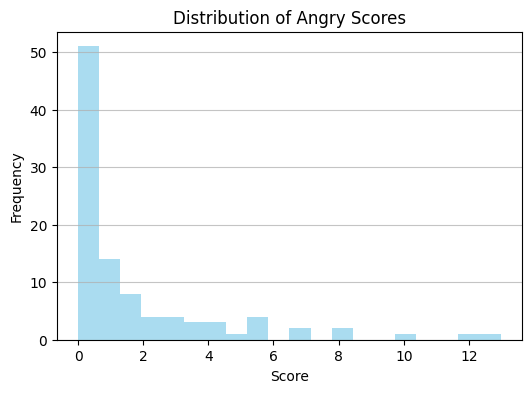

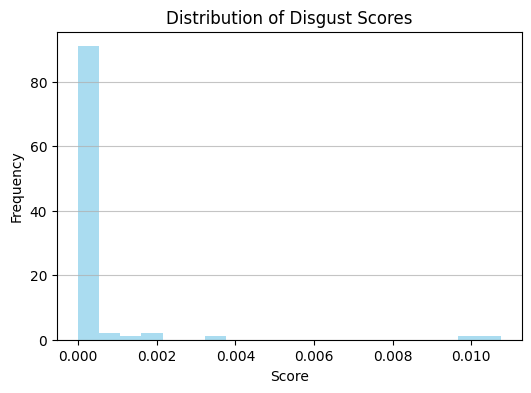

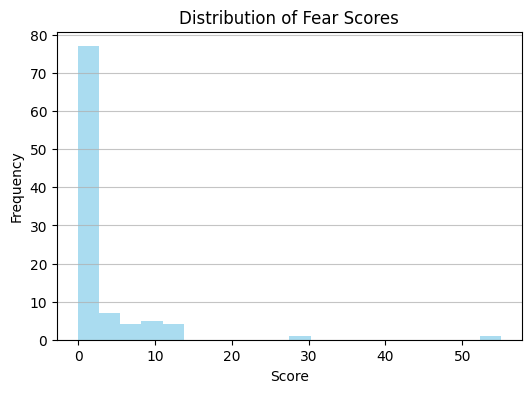

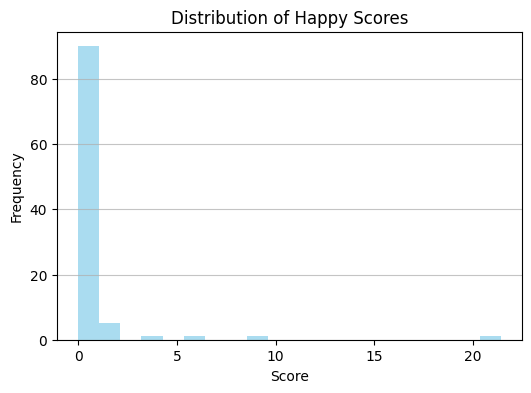

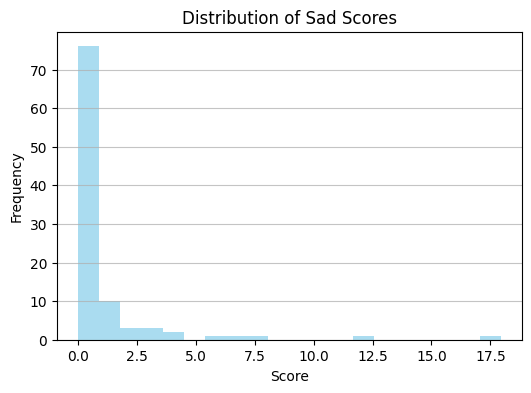

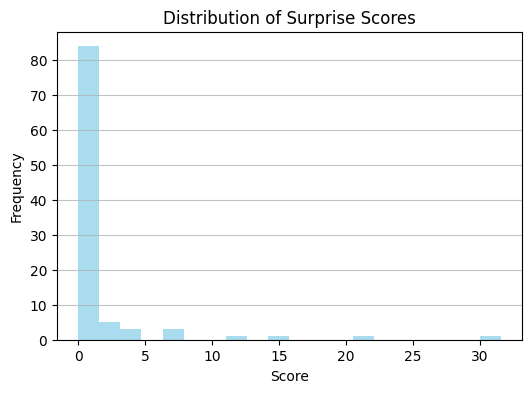

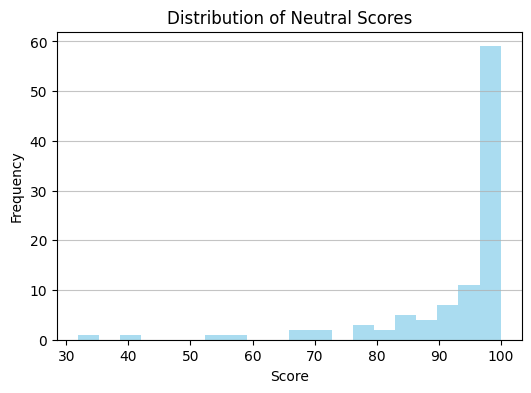

In [5]:
# Create individual histograms for each emotion score
import matplotlib.pyplot as plt
import seaborn as sns
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

for emotion in emotions:
    plt.figure(figsize=(6, 4))
    plt.hist(emotion_df[emotion], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Distribution of {emotion.capitalize()} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

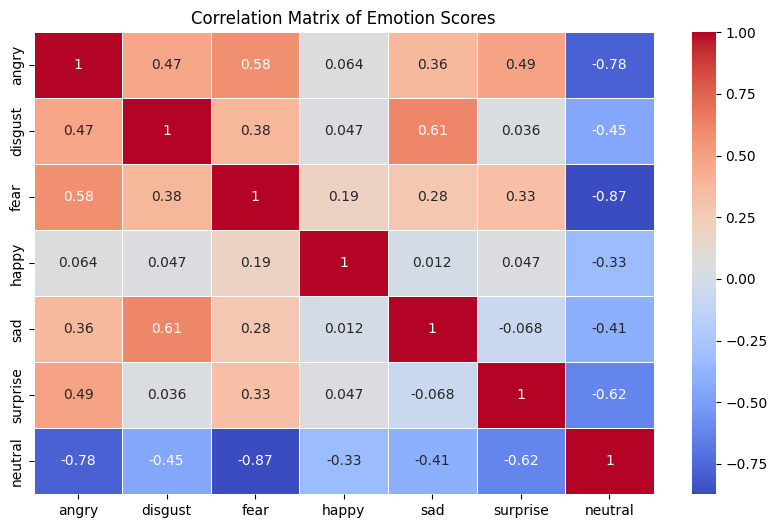

In [6]:
emotion_scores = emotion_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']]
# Calculate the correlation matrix
correlation_matrix = emotion_scores.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Emotion Scores")
plt.show()

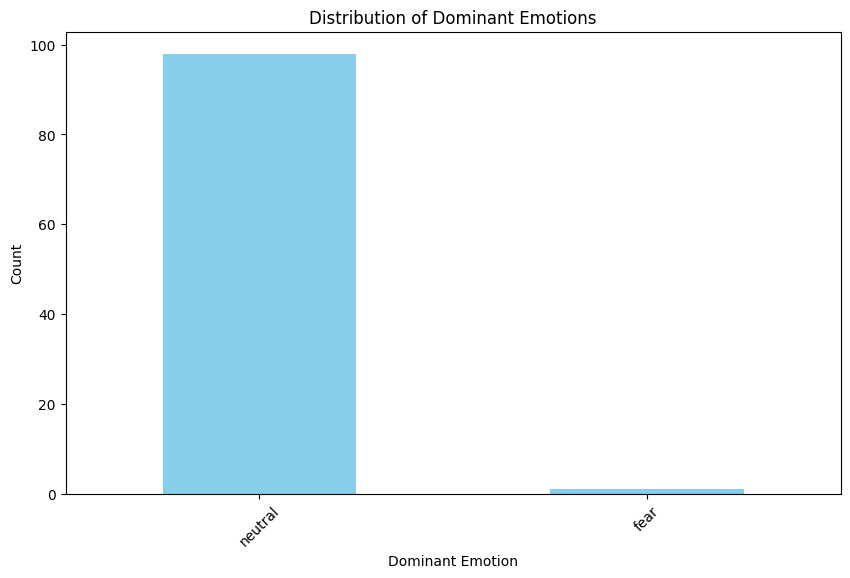

In [7]:
# Count the occurrences of each dominant emotion
dominant_emotion_counts = emotion_df['dominant_emotion'].value_counts()

# Plotting the distribution of dominant emotions
plt.figure(figsize=(10, 6))
dominant_emotion_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.title('Distribution of Dominant Emotions')
plt.xticks(rotation=45)
plt.show()

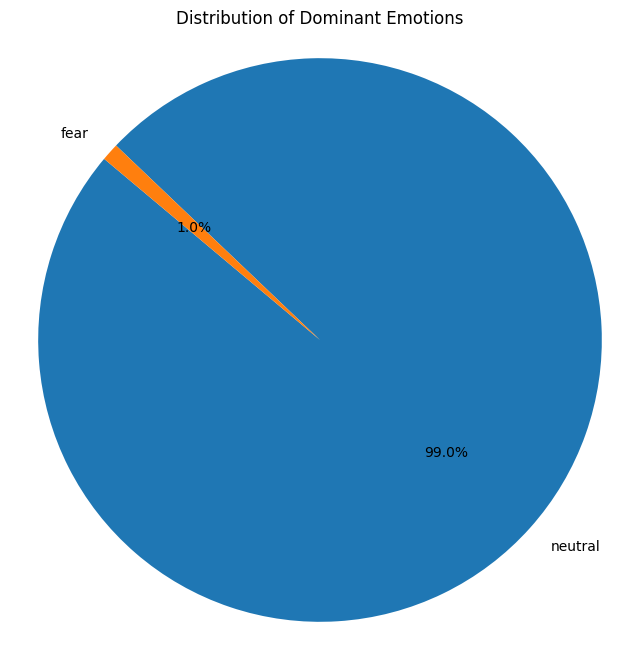

In [8]:
# Assuming you have already counted the occurrences of dominant emotions
dominant_emotion_counts = emotion_df['dominant_emotion'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_emotion_counts, labels=dominant_emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dominant Emotions')

# Equal aspect ratio ensures that the pie chart is a circle.
plt.axis('equal')

plt.show()

In [9]:
gaze_df = pd.read_csv("gaze.csv")
gaze_df.head()

,movie_id,image_seq,gaze,blink,eye_offset
0,6b0386fc-41de-4196-b0d6-3d0b815c2dbc,1,1,0,6.7544
1,6b0386fc-41de-4196-b0d6-3d0b815c2dbc,2,0,1,44.2002
2,6b0386fc-41de-4196-b0d6-3d0b815c2dbc,3,1,0,4.7784
3,6b0386fc-41de-4196-b0d6-3d0b815c2dbc,4,1,0,5.6502
4,6b0386fc-41de-4196-b0d6-3d0b815c2dbc,5,1,0,3.8508


In [10]:
# Calculate summary statistics
summary_stats_gaze = gaze_df[['gaze', 'blink', 'eye_offset']].describe()

# Print the summary statistics
print(summary_stats_gaze)

            gaze      blink  eye_offset
count  99.000000  99.000000   99.000000
mean    0.787879   0.212121   12.492482
std     0.410891   0.410891   20.419822
min     0.000000   0.000000   -7.950900
25%     1.000000   0.000000    0.804150
50%     1.000000   0.000000    4.546400
75%     1.000000   0.000000   10.922200
max     1.000000   1.000000   77.762900


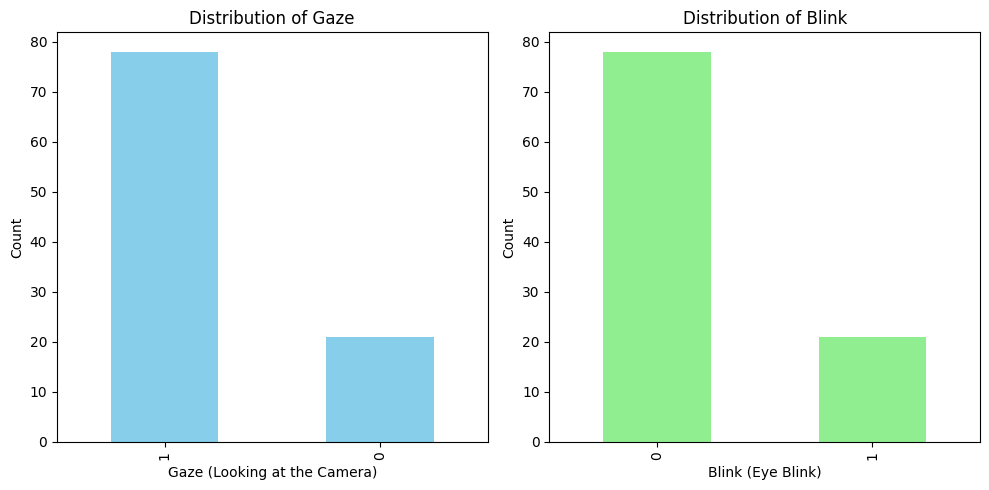

In [11]:
plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_df['gaze'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Gaze (Looking at the Camera)')
plt.ylabel('Count')
plt.title('Distribution of Gaze')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_df['blink'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Blink (Eye Blink)')
plt.ylabel('Count')
plt.title('Distribution of Blink')

plt.tight_layout()
plt.show()

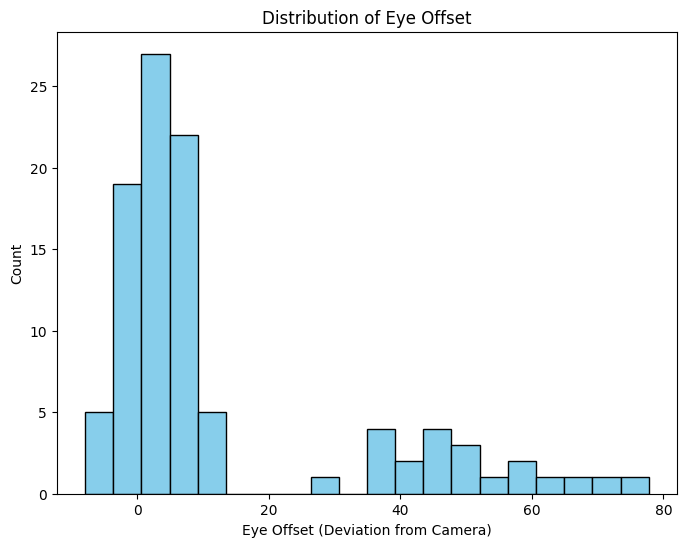

In [12]:
# Plotting the distribution of eye_offset
plt.figure(figsize=(8, 6))
plt.hist(gaze_df['eye_offset'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Eye Offset (Deviation from Camera)')
plt.ylabel('Count')
plt.title('Distribution of Eye Offset')
plt.show()

In [13]:
metadata_df = pd.read_csv("metadata.csv")
metadata_df.head()

,movie_id,image_seq,participant_id,elapsed_time,upload_time,distance
0,6b0386fc-41de-4196-b0d6-3d0b815c2dbc,0,62ea9b36-7860-4dc9-827c-600604286571,1.0,2023-09-17 07:45:04,0.0
1,6b0386fc-41de-4196-b0d6-3d0b815c2dbc,1,62ea9b36-7860-4dc9-827c-600604286571,2.0,2023-09-17 07:45:04,0.0
2,6b0386fc-41de-4196-b0d6-3d0b815c2dbc,2,62ea9b36-7860-4dc9-827c-600604286571,3.0,2023-09-17 07:45:04,0.0
3,6b0386fc-41de-4196-b0d6-3d0b815c2dbc,3,62ea9b36-7860-4dc9-827c-600604286571,4.0,2023-09-17 07:45:04,0.0
4,6b0386fc-41de-4196-b0d6-3d0b815c2dbc,4,62ea9b36-7860-4dc9-827c-600604286571,5.0,2023-09-17 07:45:04,0.0


In [14]:
metadata_df.shape

(99, 6)

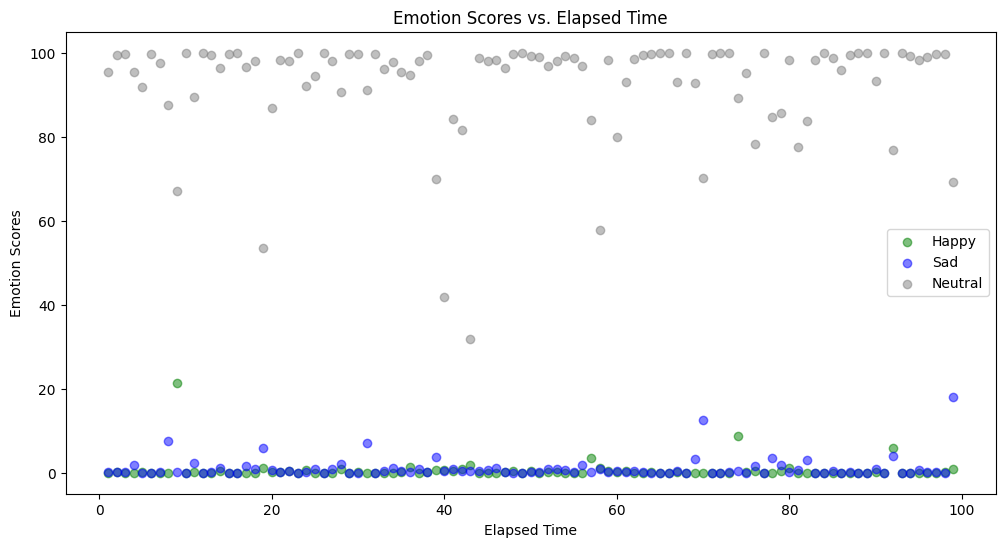

In [15]:
merged_df = pd.merge(metadata_df, emotion_df, on='image_seq')

# Plotting the relationship between elapsed_time and emotion scores
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['elapsed_time'], merged_df['happy'], alpha=0.5, label='Happy', color='green')
plt.scatter(merged_df['elapsed_time'], merged_df['sad'], alpha=0.5, label='Sad', color='blue')
plt.scatter(merged_df['elapsed_time'], merged_df['neutral'], alpha=0.5, label='Neutral', color='gray')
plt.xlabel('Elapsed Time')
plt.ylabel('Emotion Scores')
plt.legend()
plt.title('Emotion Scores vs. Elapsed Time')
plt.show()

In [16]:
merged_emotion_gaze_df = pd.merge(emotion_df, gaze_df, on='image_seq')

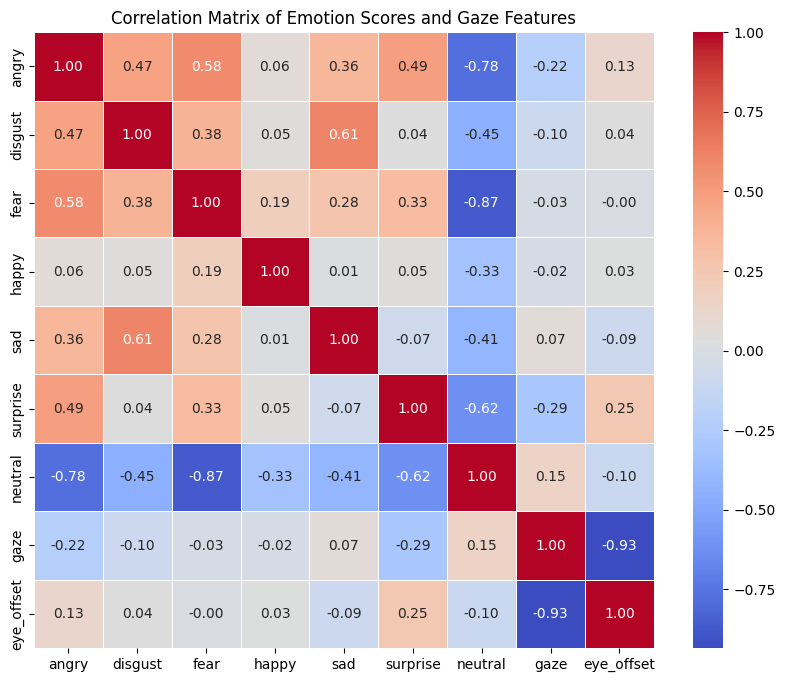

In [17]:
# Calculate the correlation matrix
correlation_matrix = merged_emotion_gaze_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral', 'gaze', 'eye_offset']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Emotion Scores and Gaze Features')
plt.show()

In [18]:
transcript_scores_df = pd.read_csv("4.csv")
transcript_scores_df.head()

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
0,0,0,0.00,5.12,"Hello, my name is Monique Mccormick. I'm from...","[50364, 2425, 11, 452, 1315, 307, 11085, 4327,...",0.0,-0.283071,1.567647,0.462725,0.498150,0.177770,0.324080,0.901964,0.956037,0.752856,0.752602,2.734375
1,1,0,5.12,9.12,graduate in electronics and communication fie...,"[50620, 8080, 294, 20611, 293, 6101, 2519, 13,...",0.0,-0.283071,1.567647,0.462725,0.660135,0.179786,0.160080,0.662276,0.646359,0.579741,0.300230,3.250000
2,2,0,9.12,14.24,analysis of shift resistors. I qualified GATE...,"[50820, 5215, 295, 5513, 4597, 830, 13, 286, 1...",0.0,-0.283071,1.567647,0.462725,0.915223,0.043608,0.041169,0.886353,0.425063,0.537448,0.347855,3.125000
3,3,0,14.24,19.36,"internship at PSK VLSI Design Center, post wh...","[51076, 16861, 412, 8168, 42, 691, 19198, 40, ...",0.0,-0.283071,1.567647,0.462725,0.398335,0.320473,0.281192,0.510848,0.716143,0.368503,0.209550,3.125000
4,4,0,19.36,24.20,under administration for 19 months. During my...,"[51332, 833, 7236, 337, 1294, 2493, 13, 6842, ...",0.0,-0.283071,1.567647,0.462725,0.579748,0.210190,0.210062,0.820169,0.824738,0.620307,0.474963,2.685950


In [19]:
# Select relevant columns for summary statistics
numerical_scores = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']]

# Calculate summary statistics
summary_stats_scores = numerical_scores.describe()

# Print the summary statistics
print(summary_stats_scores)

        positive   negative    neutral  confident   hesitant    concise  \
count  19.000000  19.000000  19.000000  19.000000  19.000000  19.000000   
mean    0.655748   0.169142   0.175110   0.621740   0.570452   0.403479   
std     0.202528   0.127333   0.094914   0.241377   0.206873   0.172476   
min     0.233843   0.022971   0.041169   0.012007   0.070168   0.131713   
25%     0.539352   0.063528   0.099623   0.545891   0.454399   0.283555   
50%     0.670338   0.147361   0.178128   0.662276   0.591770   0.406291   
75%     0.807720   0.227101   0.226315   0.786613   0.709301   0.537570   
max     0.934200   0.523588   0.399228   0.901964   0.956037   0.752856   

       enthusiastic  speech_speed  
count     19.000000     19.000000  
mean       0.440626      2.775454  
std        0.259141      0.385879  
min        0.014493      2.127660  
25%        0.235713      2.492817  
50%        0.352678      2.685950  
75%        0.655533      3.125000  
max        0.973929      3.448276  


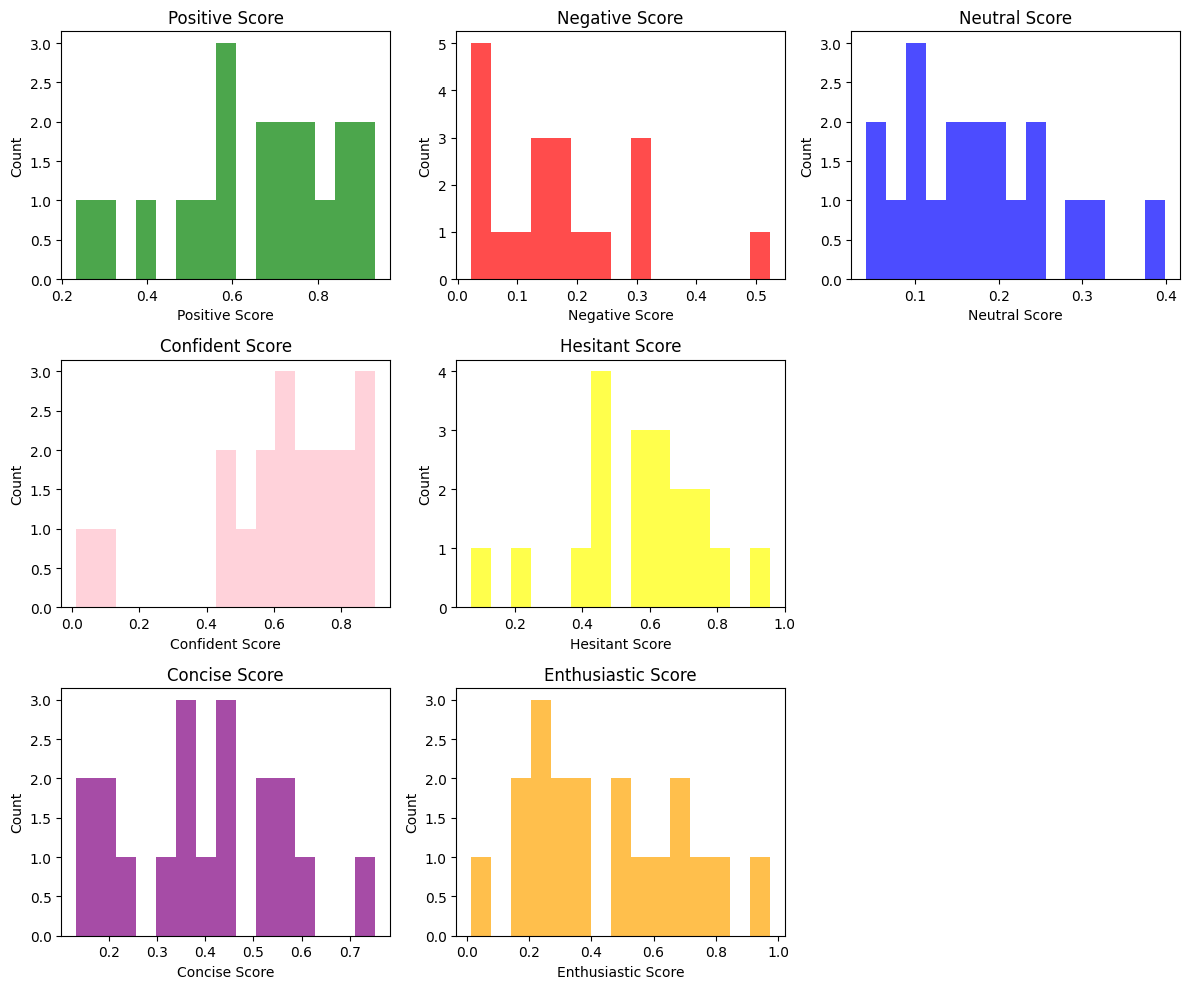

In [20]:
import matplotlib.pyplot as plt

# Create a figure with three rows and three columns
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Distribution of positive score
axes[0, 0].hist(transcript_scores_df['positive'], bins=15, color='green', alpha=0.7)
axes[0, 0].set_xlabel('Positive Score')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Positive Score')

# Distribution of negative score
axes[0, 1].hist(transcript_scores_df['negative'], bins=15, color='red', alpha=0.7)
axes[0, 1].set_xlabel('Negative Score')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Negative Score')

# Distribution of neutral score
axes[0, 2].hist(transcript_scores_df['neutral'], bins=15, color='blue', alpha=0.7)
axes[0, 2].set_xlabel('Neutral Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Neutral Score')

# Distribution of confident score
axes[1, 0].hist(transcript_scores_df['confident'], bins=15, color='pink', alpha=0.7)
axes[1, 0].set_xlabel('Confident Score')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Confident Score')

# Distribution of hesitant score
axes[1, 1].hist(transcript_scores_df['hesitant'], bins=15, color='yellow', alpha=0.7)
axes[1, 1].set_xlabel('Hesitant Score')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Hesitant Score')

# Distribution of concise score
axes[2, 0].hist(transcript_scores_df['concise'], bins=15, color='purple', alpha=0.7)
axes[2, 0].set_xlabel('Concise Score')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Concise Score')

# Distribution of enthusiastic score
axes[2, 1].hist(transcript_scores_df['enthusiastic'], bins=15, color='orange', alpha=0.7)
axes[2, 1].set_xlabel('Enthusiastic Score')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Enthusiastic Score')

# Remove the empty subplots
fig.delaxes(axes[1, 2])
fig.delaxes(axes[2, 2])

# Ensure tight layout
plt.tight_layout()

# Show the plots
plt.show()

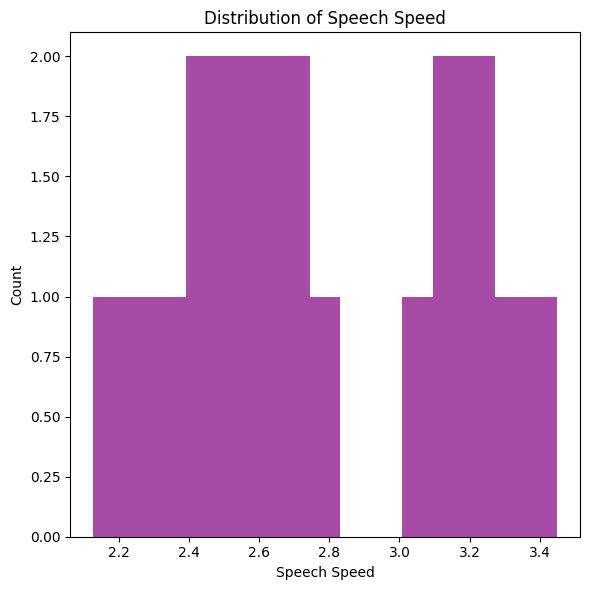

In [21]:
# Plotting the distribution of speech_speed
plt.figure(figsize=(6, 6))

# Distribution of speech_speed
plt.hist(transcript_scores_df['speech_speed'], bins=15, color='purple', alpha=0.7)
plt.xlabel('Speech Speed')
plt.ylabel('Count')
plt.title('Distribution of Speech Speed')

plt.tight_layout()
plt.show()

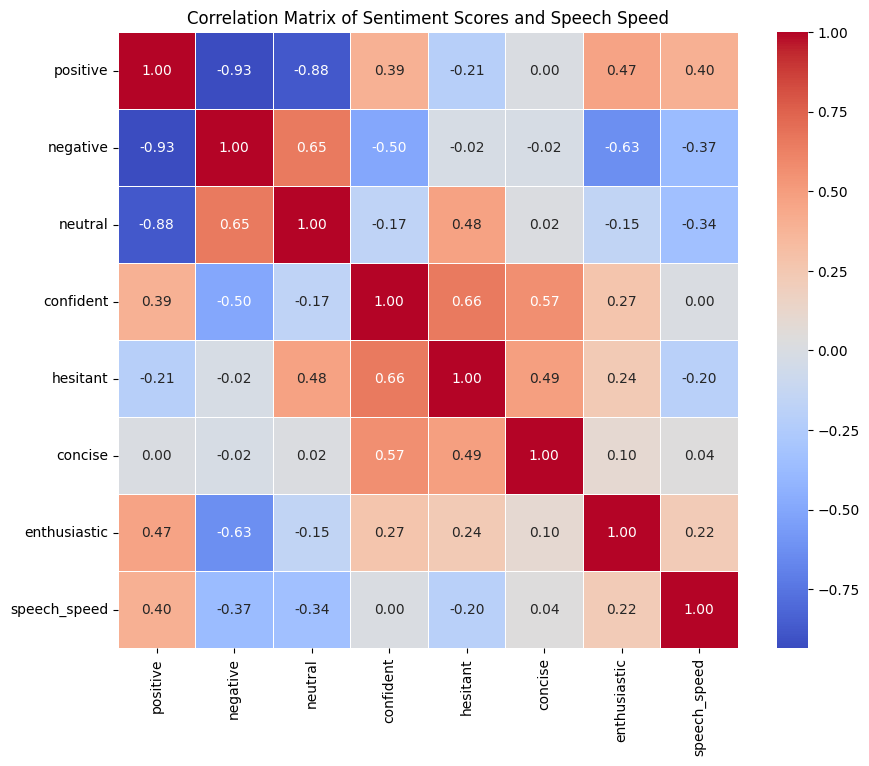

In [22]:
# Calculate the correlation matrix
correlation_matrix = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Sentiment Scores and Speech Speed')
plt.show()

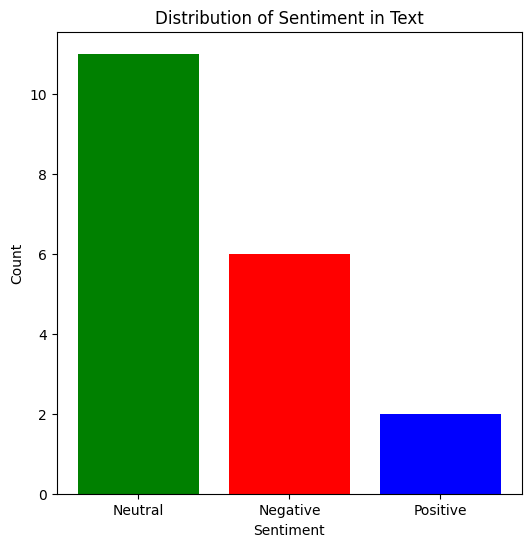

In [23]:
from textblob import TextBlob

# Function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'text' column
transcript_scores_df['sentiment'] = transcript_scores_df['text'].apply(get_sentiment)

# Count the occurrences of each sentiment
sentiment_counts = transcript_scores_df['sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(6, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in Text')
plt.show()

In [24]:
# Assuming 'transcript_scores_df' is the DataFrame containing the transcript scores dataset
# Replace it with the actual DataFrame name you have

# Create a function to find the dominant quality
def find_dominant_quality(row):
    qualities = ['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic']
    max_quality = qualities[0]
    max_score = row[max_quality]

    for quality in qualities:
        if row[quality] > max_score:
            max_score = row[quality]
            max_quality = quality

    return max_quality

# Apply the function to create a new column 'dominant_quality'
transcript_scores_df['dominant_quality'] = transcript_scores_df.apply(find_dominant_quality, axis=1)

# Display the DataFrame with the 'dominant_quality' column
print(transcript_scores_df[['text', 'dominant_quality']])


                                                 text dominant_quality
0    Hello, my name is Monique Mccormick. I'm from...         hesitant
1    graduate in electronics and communication fie...        confident
2    analysis of shift resistors. I qualified GATE...         positive
3    internship at PSK VLSI Design Center, post wh...         hesitant
4    under administration for 19 months. During my...         hesitant
5    inclination towards management, and I've prov...         positive
6    in achieving their results. To expand my skil...         positive
7    undertook various courses such as consulting ...         positive
8    by NASM and data science specialization by IB...        confident
9    and machine learning. Apart from my academics...        confident
10   stages of my life. To mention a few, I was ev...         hesitant
11   I was elected student people leader of my sch...         positive
12   past four years. If I have to talk about my s...         positive
13   l

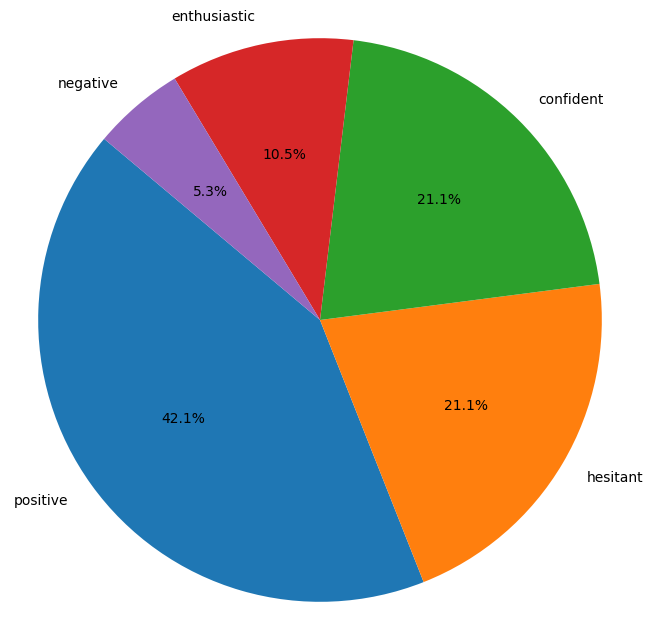

In [25]:
import matplotlib.pyplot as plt

# Assuming 'transcript_scores_df' is the DataFrame with the 'dominant_quality' column
# Replace it with the actual DataFrame name you have

# Count the occurrences of each dominant quality
dominant_quality_counts = transcript_scores_df['dominant_quality'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_quality_counts, labels=dominant_quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


In [26]:
emotion_percentage_dict = dict(zip(dominant_emotion_counts.index, dominant_emotion_counts / dominant_emotion_counts.sum()))
emotion_percentage_dict

{'neutral': 0.98989898989899, 'fear': 0.010101010101010102}

In [43]:
emotion_percentage_dict['disgust']=0
emotion_percentage_dict['happy']=0
emotion_percentage_dict['angry']=0
emotion_percentage_dict['sad']=0
emotion_percentage_dict['surprise']=0

In [44]:
def calculate_emotion_score(emotion_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in emotion_df.columns:
            if emotion in ['angry', 'disgust', 'sad', 'fear']:
                emotion_score -= emotion_df[emotion].mean() * weight
            else:
                emotion_score += emotion_df[emotion].mean() * weight

    return emotion_score

In [45]:
emotion_score = calculate_emotion_score(emotion_df, emotion_percentage_dict)
print(f"Emotion Score: {emotion_score}")

Emotion Score: -0.0262857696540149


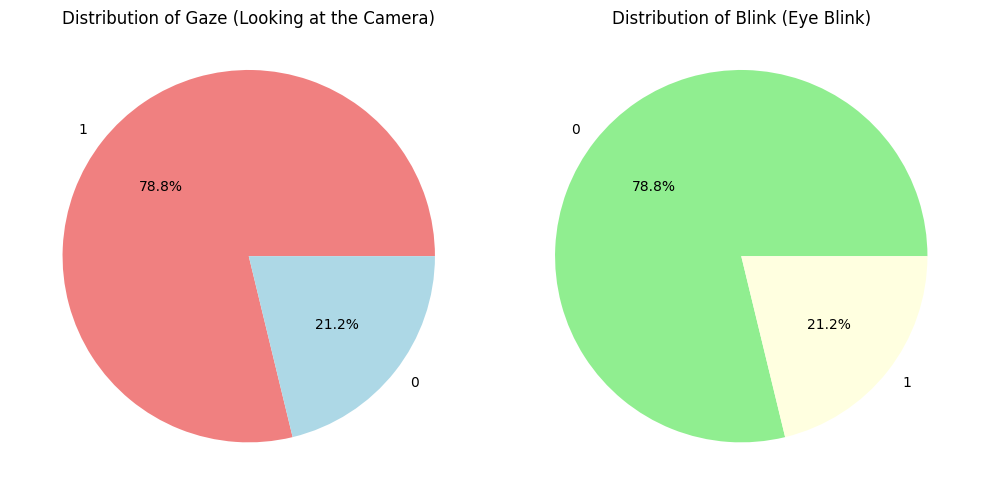

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_gaze_counts = gaze_df['gaze'].value_counts()
plt.pie(gaze_gaze_counts, labels=gaze_gaze_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Gaze (Looking at the Camera)')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_blink_counts = gaze_df['blink'].value_counts()
plt.pie(gaze_blink_counts, labels=gaze_blink_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightyellow'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Blink (Eye Blink)')

plt.tight_layout()
plt.show()

In [32]:
def calculate_offset_score(gaze_df):
    # Calculate the Offset Score based on the gaze data

    # Calculate the mean and median of absolute values of offset
    mean_offset = gaze_df['eye_offset'].abs().mean()
    median_offset = gaze_df['eye_offset'].abs().median()

    # Calculate the Offset Score as a weighted average
    offset_score = (mean_offset + median_offset) / 2

    return offset_score/90

In [33]:
def calculate_blink_score(gaze_df):
    # Calculate the Blink Score based on the provided formula

    # Calculate the mean of gaze values
    mean_blink = gaze_df['gaze'].mean()

    # Calculate the absolute difference between blink and no blink, then take the mean
    abs_diff = (gaze_df['blink'] - 1).abs().mean()

    # Calculate the Blink Score
    blink_score = 1 - mean_blink - abs_diff

    return blink_score

In [34]:
Offset_and_Blink_Score = calculate_blink_score(gaze_df) + calculate_offset_score(gaze_df)
Offset_and_Blink_Score

-0.4704028451178451

In [35]:
sentiment_percentage_dict = dict(zip(dominant_quality_counts.index, dominant_quality_counts / dominant_quality_counts.sum()))
sentiment_percentage_dict

{'positive': 0.42105263157894735,
 'hesitant': 0.21052631578947367,
 'confident': 0.21052631578947367,
 'enthusiastic': 0.10526315789473684,
 'negative': 0.05263157894736842}

In [37]:
sentiment_percentage_dict['concise']=0
sentiment_percentage_dict['neutral']=0
sentiment_percentage_dict

{'positive': 0.42105263157894735,
 'hesitant': 0.21052631578947367,
 'confident': 0.21052631578947367,
 'enthusiastic': 0.10526315789473684,
 'negative': 0.05263157894736842,
 'concise': 0,
 'neutral': 0}

In [38]:
def sentiment_score(transcript_scores_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in transcript_scores_df.columns:
            if emotion in ['hesitant', 'negative']:
                emotion_score -= transcript_scores_df[emotion].mean() * weight
            else:
                emotion_score += transcript_scores_df[emotion].mean() * weight

    return emotion_score

In [39]:
Sentiment_score = sentiment_score(transcript_scores_df, sentiment_percentage_dict)
Sentiment_score

0.32438161751962263

In [40]:
def calculate_speech_speed_closeness(transcript_scores_df, target_speech_speed=3.5):
    # Calculate the closeness of speech speed to the target value (default: 3.5)

    # Ensure that 'speech_speed' is a column in the DataFrame
    if 'speech_speed' not in transcript_scores_df.columns:
        return None  # If 'speech_speed' column is not present

    # Calculate the absolute difference between speech speed and the target
    transcript_scores_df['speech_speed_difference'] = abs(transcript_scores_df['speech_speed'] - target_speech_speed)

    # Calculate the mean of absolute differences
    mean_difference = transcript_scores_df['speech_speed_difference'].mean()

    # The closer to zero the mean difference is, the closer the speech speed is to the target
    return mean_difference


In [41]:
# Calculate speech speed closeness for your DataFrame
closeness_score = calculate_speech_speed_closeness(transcript_scores_df)

# Print the closeness score
print("Speech Speed Closeness Score:", closeness_score)

Speech Speed Closeness Score: 0.7245459270146286


In [46]:
Total_Score = emotion_score + 10*Sentiment_score + closeness_score*5+ Offset_and_Blink_Score
Total_Score

6.369857195497509